# Preliminary analysis

In [ ]:
from huggingface_hub import hf_hub_download

file_path = hf_hub_download(
    repo_id="facebook/BigOBench",
    filename="data/problem_and_human_solutions_list.jsonl",
    repo_type="dataset"
)

In [19]:
import pandas as pd

df_problem_and_human_solutions_list = pd.read_json(file_path, lines=True)

In [73]:
file_path = hf_hub_download(
    repo_id="facebook/BigOBench",
    filename="data/complexity_labels_light.jsonl",
    repo_type="dataset"
)

df_complexity_labels_light = pd.read_json(file_path, lines=True)

python(33573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [20]:
import json
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import string
import re
import seaborn as sns
import pandas as pd
import collections
import numpy as np
import collections
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist

regex_punctuation = '[' + string.punctuation + ']'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chiaranguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Show the column names
df_problem_and_human_solutions_list.columns

Index(['problem_id', 'problem_name', 'description', 'correct_solution_list',
       'data_source', 'source_specific_limits', 'codeforces_specific_metadata',
       'tests', 'human_accuracy_rate', 'dataclass', 'complexity_framework'],
      dtype='object')

In [25]:
# Count the number of rows in the dataframe
df_length = len(df_problem_and_human_solutions_list)
print(f"Number of rows in the dataframe: {df_length}")

Number of rows in the dataframe: 3105


In [28]:
# Esempio: filtrare le righe dove description['is_description_translated'] è True
import json

# Se description è stringa JSON, decodifica
if isinstance(df_problem_and_human_solutions_list['description'].iloc[0], str):
    df_problem_and_human_solutions_list['description'] = df_problem_and_human_solutions_list['description'].apply(json.loads)

filtered_df = df_problem_and_human_solutions_list[df_problem_and_human_solutions_list['description'].apply(
    lambda x: isinstance(x, dict) and x.get('is_description_translated') is True
)]

print(f"Number of rows where description['is_description_translated'] is True: {len(filtered_df)}")

Number of rows where description['is_description_translated'] is True: 29


In [ ]:
# Remove from description is_description_translated and untranslated_text
def remove_untranslated_text(description):
    if isinstance(description, dict):
        description.pop('is_description_translated', None)
        description.pop('untranslated_text', None)
    return description

df_problem_and_human_solutions_list['description'] = df_problem_and_human_solutions_list['description'].apply(remove_untranslated_text)

In [32]:
# Remove dict in description and keep only the text
def extract_text_from_description(description):
    if isinstance(description, dict):
        return description.get('text', '')
    return description

df_problem_and_human_solutions_list['description'] = df_problem_and_human_solutions_list['description'].apply(extract_text_from_description)

In [ ]:
df_problem_and_human_solutions_list

,problem_id,problem_name,description,correct_solution_list,data_source,source_specific_limits,codeforces_specific_metadata,tests,human_accuracy_rate,dataclass,complexity_framework
0,0,339_C. Xenia and Weights,Xenia has a set of weights and pan scales. Eac...,"[{'solution_id': '0_0', 'solution_code': '__au...",CODEFORCES,"{'time_limit': {'seconds': 2, 'nanos': 0}, 'me...","{'cf_contest_id': 339, 'cf_index': 'C', 'cf_po...","{'public_tests': [{'input': '0000000101 3 ', '...",0.281633,{'dataclass_code': 'import sys import time imp...,{'time_complexity_fail_rate': 0.40579710144927...
1,1,1547_E. Air Conditioners,On a strip of land of length n there are k air...,"[{'solution_id': '1_0', 'solution_code': 'def ...",CODEFORCES,"{'time_limit': {'seconds': 2, 'nanos': 0}, 'me...","{'cf_contest_id': 1547, 'cf_index': 'E', 'cf_p...",{'public_tests': [{'input': '5 6 2 2 5 14 16 ...,0.620833,{'dataclass_code': 'import sys import time imp...,{'time_complexity_fail_rate': 0.11409395973154...
2,2,268_C. Beautiful Sets of Points,Manao has invented a new mathematical term — a...,"[{'solution_id': '2_0', 'solution_code': 'if _...",CODEFORCES,"{'time_limit': {'seconds': 1, 'nanos': 0}, 'me...","{'cf_contest_id': 268, 'cf_index': 'C', 'cf_po...","{'public_tests': [{'input': '2 2 ', 'output': ...",0.525066,{'dataclass_code': 'import sys import time imp...,{'time_complexity_fail_rate': 0.05527638190954...
3,3,478_C. Table Decorations,"You have r red, g green and b blue balloons. T...","[{'solution_id': '3_0', 'solution_code': 'a = ...",CODEFORCES,"{'time_limit': {'seconds': 1, 'nanos': 0}, 'me...","{'cf_contest_id': 478, 'cf_index': 'C', 'cf_po...","{'public_tests': [{'input': '1 1 1 ', 'output'...",0.562264,{'dataclass_code': 'import sys import time imp...,{'time_complexity_fail_rate': 0.41610738255033...
4,4,5_C. Longest Regular Bracket Sequence,This is yet another problem dealing with regul...,"[{'solution_id': '4_0', 'solution_code': 'stri...",CODEFORCES,"{'time_limit': {'seconds': 2, 'nanos': 0}, 'me...","{'cf_contest_id': 5, 'cf_index': 'C', 'cf_poin...","{'public_tests': [{'input': ')((())))(()()) ',...",0.395939,{'dataclass_code': 'import sys import time imp...,{'time_complexity_fail_rate': 0.03846153846153...


In [47]:
# Count the number of duplicate descriptions
df_problem_and_human_solutions_list['description'] = df_problem_and_human_solutions_list['description'].apply(extract_text_from_description)

description_counts = df_problem_and_human_solutions_list['description'].value_counts()

duplicate_descriptions = description_counts[description_counts > 1]

print("Number of unique descriptions:", len(description_counts))
print("Number of duplicated descriptions:", len(duplicate_descriptions))


Number of unique descriptions: 3031
Number of duplicated descriptions: 74


In [50]:
# Count the average number of solutions per problem in correct_solution_list column
def count_solutions(row):
    if isinstance(row, list):
        return len(row)
    return 0

# Averge number of solutions
average_num_solutions = df_problem_and_human_solutions_list['correct_solution_list'].apply(count_solutions).mean()
print(f"Average number of solutions per problem: {average_num_solutions}")


Average number of solutions per problem: 383.3333333333333


In [51]:
# Maximum number of solutions
max_num_solutions = df_problem_and_human_solutions_list['correct_solution_list'].apply(count_solutions).max()
print(f"Maximum number of solutions per problem: {max_num_solutions}")

# Minimum number of solutions
min_num_solutions = df_problem_and_human_solutions_list['correct_solution_list'].apply(count_solutions).min()
print(f"Minimum number of solutions per problem: {min_num_solutions}")

Maximum number of solutions per problem: 13856
Minimum number of solutions per problem: 51


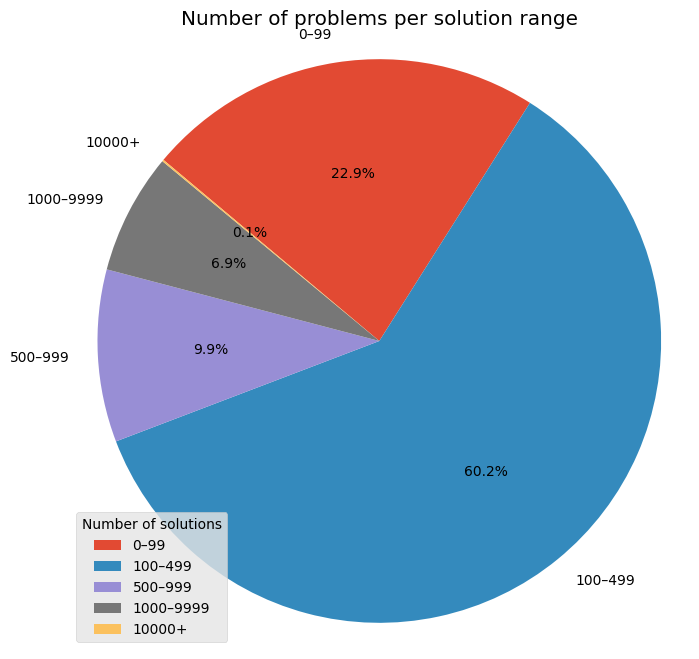

In [69]:
solution_counts = df_problem_and_human_solutions_list['correct_solution_list'].apply(count_solutions)

bins = [0, 100, 500, 1000, 10000, float('inf')]
labels = ['0–99', '100–499', '500–999', '1000–9999', '10000+']

solution_ranges = pd.cut(solution_counts, bins=bins, labels=labels, right=False)

range_counts = solution_ranges.value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('Number of problems per solution range')
plt.axis('equal')
plt.legend(title='Number of solutions', loc='lower left')
plt.show()

In [70]:
# Drop data_source column
df_problem_and_human_solutions_list = df_problem_and_human_solutions_list.drop(columns=['data_source'])

In [71]:
# Drop source_specific_limits column
df_problem_and_human_solutions_list = df_problem_and_human_solutions_list.drop(columns=['source_specific_limits'])

In [72]:
# Number of words in the description
def count_words(text):
    if isinstance(text, str):
        return len(re.findall(r'\w+', text))
    return 0

average_num_words = df_problem_and_human_solutions_list['description'].apply(count_words).mean()
print(f"Average number of words in the description: {average_num_words}")
# Maximum number of words in the description
max_num_words = df_problem_and_human_solutions_list['description'].apply(count_words).max()
print(f"Maximum number of words in the description: {max_num_words}")
# Minimum number of words in the description
min_num_words = df_problem_and_human_solutions_list['description'].apply(count_words).min()
print(f"Minimum number of words in the description: {min_num_words}")

Average number of words in the description: 277.75780998389695
Maximum number of words in the description: 965
Minimum number of words in the description: 21


In [74]:
# Count the number of missing values in time_complexity_inferred
missing_time_complexity = df_complexity_labels_light['time_complexity_inferred'].isnull().sum()
print(f"Number of missing values in time_complexity_inferred: {missing_time_complexity}")

# Count the number of missing values in space_complexity_inferred
missing_space_complexity = df_complexity_labels_light['space_complexity_inferred'].isnull().sum()
print(f"Number of missing values in space_complexity_inferred: {missing_space_complexity}")

Number of missing values in time_complexity_inferred: 147408
Number of missing values in space_complexity_inferred: 148671


In [75]:
# Count the number of distinct time complexities
distinct_time_complexities = df_complexity_labels_light['time_complexity_inferred'].nunique()
print(f"Number of distinct time complexities: {distinct_time_complexities}")

# Count the number of distinct space complexities
distinct_space_complexities = df_complexity_labels_light['space_complexity_inferred'].nunique()
print(f"Number of distinct space complexities: {distinct_space_complexities}")

Number of distinct time complexities: 439
Number of distinct space complexities: 262


In [80]:
# Print the most common time complexities
time_complexity_counts = df_complexity_labels_light['time_complexity_inferred'].value_counts().head(10)
print("Most common time complexities:")
print(time_complexity_counts)

Most common time complexities:
time_complexity_inferred
O(n)          433023
O(1)          231879
O(nlogn)      105496
O(n**2)        83634
O(n*m)         56610
O(n+m)         37639
O(logn)        19464
O(n+mlogm)     10895
O(nlogn+m)      9755
O(n*mlogm)      9555
Name: count, dtype: int64


In [81]:
# Print the most common space complexities
space_complexity_counts = df_complexity_labels_light['space_complexity_inferred'].value_counts().head(10)
print("Most common space complexities:")
print(space_complexity_counts)

Most common space complexities:
space_complexity_inferred
O(n)            537972
O(1)            294934
O(n*m)           55585
O(n**2)          37183
O(n+m)           34146
O(logn)          26314
O(nlogn)         14298
O(logn*logm)      9929
O(n+m**2)         4491
O(n**2+m)         3482
Name: count, dtype: int64


In [83]:
# Print the most common time complexities and space complexities together
time_space_complexity_counts = df_complexity_labels_light.groupby(['time_complexity_inferred', 'space_complexity_inferred']).size().reset_index(name='counts')
time_space_complexity_counts = time_space_complexity_counts.sort_values(by='counts', ascending=False).head(10)
print("Most common time and space complexities:")
print(time_space_complexity_counts)

Most common time and space complexities:
     time_complexity_inferred space_complexity_inferred  counts
646                      O(n)                      O(n)  328719
423                      O(1)                      O(1)  174404
639                      O(n)                      O(1)   79135
2131                 O(nlogn)                      O(n)   78020
834                   O(n**2)                      O(n)   42322
1280                   O(n*m)                    O(n*m)   34980
440                      O(1)                      O(n)   25787
840                   O(n**2)                   O(n**2)   20887
424                      O(1)                   O(logn)   16652
1264                   O(n*m)                      O(n)   15444


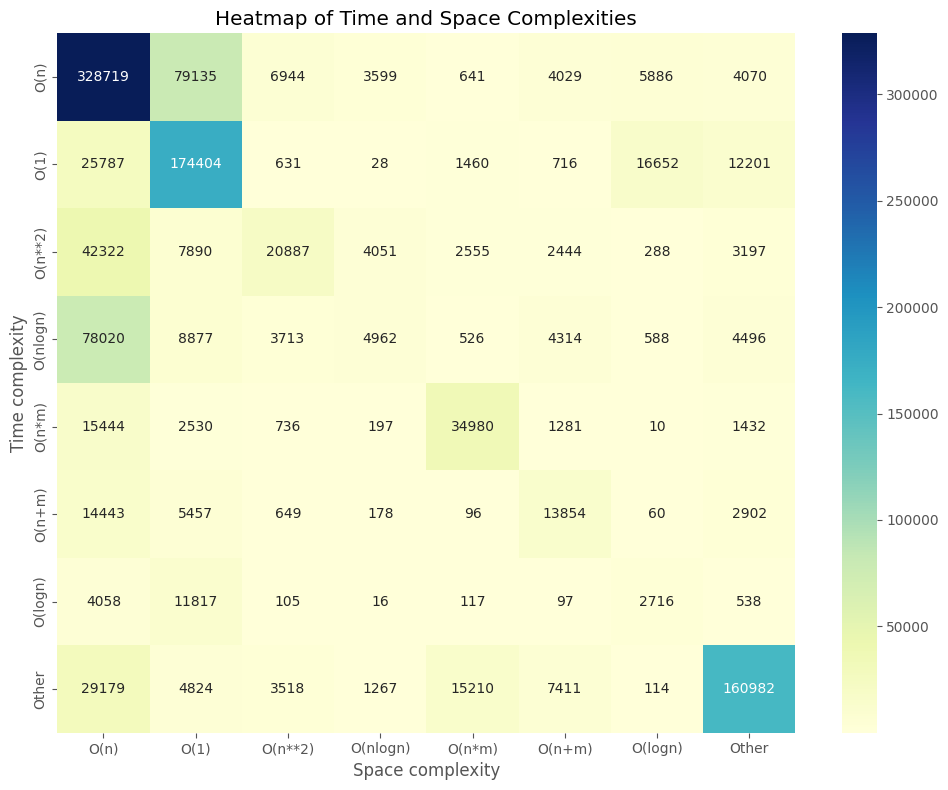

In [89]:
# Create a heatmap of time and space complexities
all_complexities = pd.concat([
    df_complexity_labels_light['time_complexity_inferred'],
    df_complexity_labels_light['space_complexity_inferred']
])
top_7_complexities = all_complexities.value_counts().head(7).index.tolist()

df_temp = df_complexity_labels_light.copy()
df_temp['time'] = df_temp['time_complexity_inferred'].apply(lambda x: x if x in top_7_complexities else 'Other')
df_temp['space'] = df_temp['space_complexity_inferred'].apply(lambda x: x if x in top_7_complexities else 'Other')

heatmap_data = df_temp.groupby(['time', 'space']).size().unstack(fill_value=0)

ordered_labels = top_7_complexities + ['Other']
heatmap_data = heatmap_data.reindex(index=ordered_labels, columns=ordered_labels, fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Time and Space Complexities")
plt.xlabel("Space complexity")
plt.ylabel("Time complexity")
plt.tight_layout()
plt.show()

In [94]:
def extract_cf_tags(metadata):
    if isinstance(metadata, dict):
        return metadata.get('cf_tags', [])
    return []

# Count the number of unique CF tags
cf_tags_counts = df_problem_and_human_solutions_list['codeforces_specific_metadata'].apply(extract_cf_tags).explode().value_counts()
print("Number of unique CF tags:", len(cf_tags_counts))

Number of unique CF tags: 37


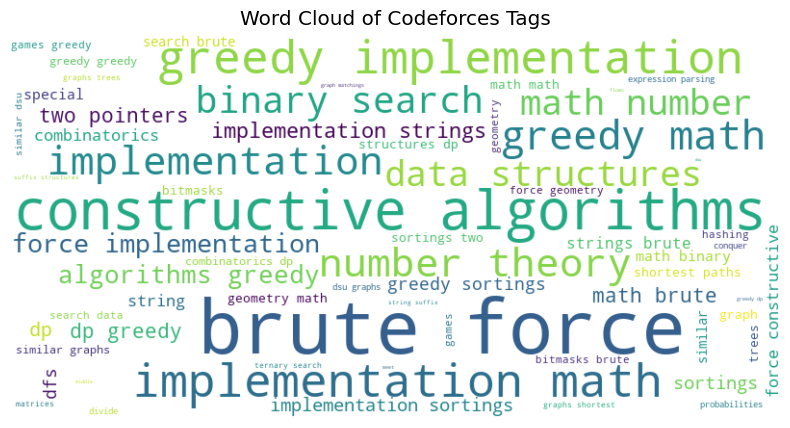

In [ ]:
# Create a word cloud of cf_tags in codeforces_specific_metadata column
cf_tags_list = df_problem_and_human_solutions_list['codeforces_specific_metadata'].apply(extract_cf_tags).explode().dropna()
worldcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cf_tags_list))
plt.figure(figsize=(10, 5))
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Codeforces Tags")
plt.show()

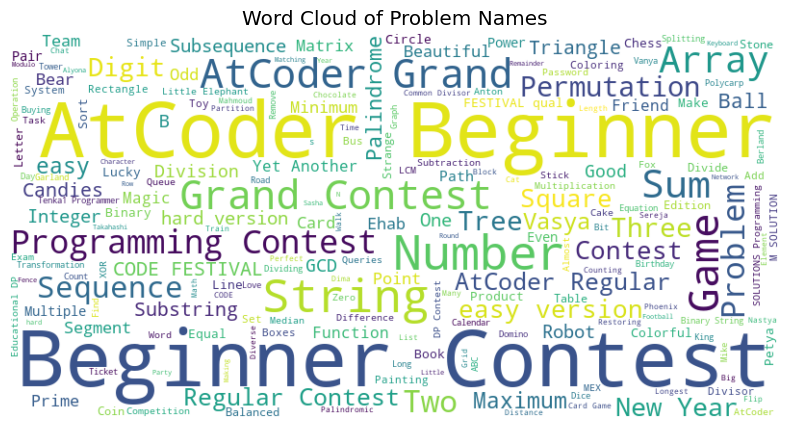

In [95]:
# Crate a world cloud of the problem name
problem_name_list = df_problem_and_human_solutions_list['problem_name'].dropna()
worldcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(problem_name_list))
plt.figure(figsize=(10, 5))
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Problem Names")
plt.show()